In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import layers, models, optimizers


## RNN 종류
---
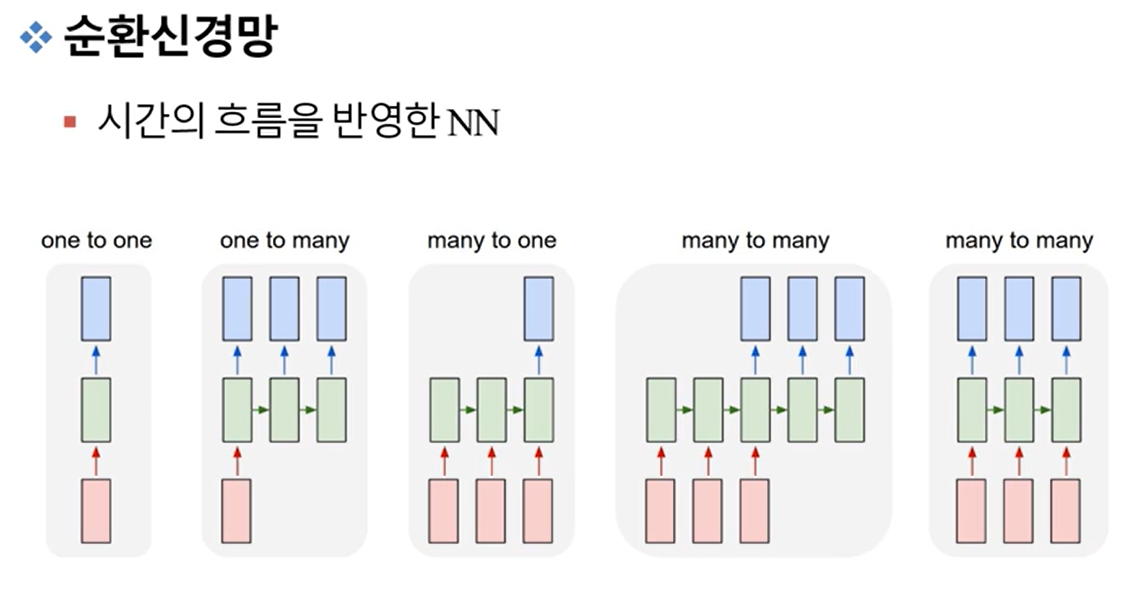

* one-to-one 은 MLP 와 동일하게 보아도 됨

(400,)


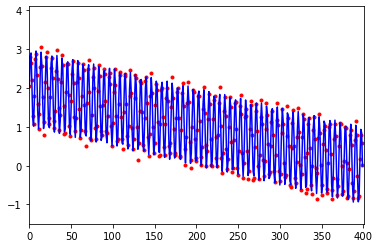

In [36]:
# 시계열 데이터 예측

# 가상 시계열 데이터 생성
# sinc graph 400개에 np.random.normal을 통해 noise 추가(평균:0, 표준편차: 1)
# 마지막으로 np.arragne(400) 을 더해주어서 점진적으로 증가하도록 만듦
# 따라서 데이터는 시간이 지날수록 상승하는 형태를 가지도록 구성
data_time =   np.sin(np.arange(400)) + np.random.normal(0, 0.1, 400) - np.arange(400)/200 + 2

print(data_time.shape)

plt.plot(data_time, 'r.')
plt.plot(range(400), np.sin(np.arange(400)) - np.arange(400)/200 + 2, 'b')
plt.xlim(-0.5, 400.5)
plt.ylim(-1.5, 4.1)
plt.show()

## MLP
* 이전 데이터 3개를 보고 다음 데이터를 예측하는 문제로 구성

In [37]:

data_matrix = []
# 이전 데이터 3개를 보기 위해 sequence_length = 3 으로 설정
seq_len = 3 

# sequence_length 로 묶어서 data_matrix를 구성
for i in range(0, len(data_time)-seq_len):
    tmp_data = data_time[i:i+seq_len+1]
    data_matrix.append(tmp_data)

data_matrix_np = np.array(data_matrix)
print(data_matrix_np.shape)
print(data_matrix_np)

(397, 4)
[[ 2.04387281  2.79549309  2.63687323  2.2095365 ]
 [ 2.79549309  2.63687323  2.2095365   1.2721992 ]
 [ 2.63687323  2.2095365   1.2721992   1.06249859]
 ...
 [-0.83436105 -0.7864364   0.16112249  0.78588027]
 [-0.7864364   0.16112249  0.78588027  0.58244701]
 [ 0.16112249  0.78588027  0.58244701  0.01894878]]


In [38]:
datax = data_matrix_np[:,0:3]
datay = data_matrix_np[:,3]

print(datax)
print(datax.shape)
print(datay.shape)

[[ 2.04387281  2.79549309  2.63687323]
 [ 2.79549309  2.63687323  2.2095365 ]
 [ 2.63687323  2.2095365   1.2721992 ]
 ...
 [-0.83436105 -0.7864364   0.16112249]
 [-0.7864364   0.16112249  0.78588027]
 [ 0.16112249  0.78588027  0.58244701]]
(397, 3)
(397,)


In [39]:
# Train Data와 Validation Data 분리
trnx = datax[0:300, :]
trny = datay[0:300]
tstx = datax[300:datax.shape[0],:]
tsty = datay[300:datax.shape[0]]
print(trnx.shape)
print(tstx.shape)
print(trny.shape)
print(tsty.shape)

(300, 3)
(97, 3)
(300,)
(97,)


In [40]:
input_shape = (3,) 

mlp_model = models.Sequential()
mlp_model.add(layers.Dense(units = 5, activation = 'tanh', input_shape = input_shape))
mlp_model.add(layers.Dense(units = 10, activation = 'tanh' ))
mlp_model.add(layers.Dense(units = 1, activation = 'linear'))

mlp_model.compile(optimizer="Adam", loss = "mean_squared_error", metrics = ['mean_squared_error'])


In [41]:
mlp_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 5)                 20        
                                                                 
 dense_10 (Dense)            (None, 10)                60        
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [42]:
history = mlp_model.fit(trnx, trny, validation_data = [tstx, tsty], batch_size=10, epochs=300)

Epoch 1/300
30/30 [==============================] - 0s 4ms/step - loss: 2.5209 - mean_squared_error: 2.5209 - val_loss: 2.3051 - val_mean_squared_error: 2.3051
Epoch 2/300
30/30 [==============================] - 0s 1ms/step - loss: 1.7952 - mean_squared_error: 1.7952 - val_loss: 1.9640 - val_mean_squared_error: 1.9640
Epoch 3/300
30/30 [==============================] - 0s 2ms/step - loss: 1.3352 - mean_squared_error: 1.3352 - val_loss: 1.6661 - val_mean_squared_error: 1.6661
Epoch 4/300
30/30 [==============================] - 0s 2ms/step - loss: 1.0345 - mean_squared_error: 1.0345 - val_loss: 1.4012 - val_mean_squared_error: 1.4012
Epoch 5/300
30/30 [==============================] - 0s 2ms/step - loss: 0.7963 - mean_squared_error: 0.7963 - val_loss: 1.1317 - val_mean_squared_error: 1.1317
Epoch 6/300
30/30 [==============================] - 0s 2ms/step - loss: 0.5985 - mean_squared_error: 0.5985 - val_loss: 0.9238 - val_mean_squared_error: 0.9238
Epoch 7/300
30/30 [===============

30/30 [==============================] - 0s 1ms/step - loss: 0.0787 - mean_squared_error: 0.0787 - val_loss: 0.1420 - val_mean_squared_error: 0.1420
Epoch 52/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0776 - mean_squared_error: 0.0776 - val_loss: 0.1471 - val_mean_squared_error: 0.1471
Epoch 53/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0781 - mean_squared_error: 0.0781 - val_loss: 0.1415 - val_mean_squared_error: 0.1415
Epoch 54/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0775 - mean_squared_error: 0.0775 - val_loss: 0.1356 - val_mean_squared_error: 0.1356
Epoch 55/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.1343 - val_mean_squared_error: 0.1343
Epoch 56/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0769 - mean_squared_error: 0.0769 - val_loss: 0.1420 - val_mean_squared_error: 0.1420
Epoch 57/300
30/30 [=====================

30/30 [==============================] - 0s 1ms/step - loss: 0.0741 - mean_squared_error: 0.0741 - val_loss: 0.1004 - val_mean_squared_error: 0.1004
Epoch 102/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0735 - mean_squared_error: 0.0735 - val_loss: 0.1210 - val_mean_squared_error: 0.1210
Epoch 103/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0742 - mean_squared_error: 0.0742 - val_loss: 0.1098 - val_mean_squared_error: 0.1098
Epoch 104/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0732 - mean_squared_error: 0.0732 - val_loss: 0.1134 - val_mean_squared_error: 0.1134
Epoch 105/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0741 - mean_squared_error: 0.0741 - val_loss: 0.1014 - val_mean_squared_error: 0.1014
Epoch 106/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0743 - mean_squared_error: 0.0743 - val_loss: 0.1023 - val_mean_squared_error: 0.1023
Epoch 107/300
30/30 [===============

30/30 [==============================] - 0s 1ms/step - loss: 0.0713 - mean_squared_error: 0.0713 - val_loss: 0.0926 - val_mean_squared_error: 0.0926
Epoch 152/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0761 - mean_squared_error: 0.0761 - val_loss: 0.1020 - val_mean_squared_error: 0.1020
Epoch 153/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0728 - mean_squared_error: 0.0728 - val_loss: 0.1055 - val_mean_squared_error: 0.1055
Epoch 154/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0723 - mean_squared_error: 0.0723 - val_loss: 0.1063 - val_mean_squared_error: 0.1063
Epoch 155/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0723 - mean_squared_error: 0.0723 - val_loss: 0.1099 - val_mean_squared_error: 0.1099
Epoch 156/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0735 - mean_squared_error: 0.0735 - val_loss: 0.1047 - val_mean_squared_error: 0.1047
Epoch 157/300
30/30 [===============

Epoch 201/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0712 - mean_squared_error: 0.0712 - val_loss: 0.1028 - val_mean_squared_error: 0.1028
Epoch 202/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0714 - mean_squared_error: 0.0714 - val_loss: 0.0975 - val_mean_squared_error: 0.0975
Epoch 203/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0708 - mean_squared_error: 0.0708 - val_loss: 0.1140 - val_mean_squared_error: 0.1140
Epoch 204/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0715 - mean_squared_error: 0.0715 - val_loss: 0.1053 - val_mean_squared_error: 0.1053
Epoch 205/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0728 - mean_squared_error: 0.0728 - val_loss: 0.0984 - val_mean_squared_error: 0.0984
Epoch 206/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0712 - mean_squared_error: 0.0712 - val_loss: 0.1037 - val_mean_squared_error: 0.1037
Epoch 207/300
30/30 [=

30/30 [==============================] - 0s 1ms/step - loss: 0.0730 - mean_squared_error: 0.0730 - val_loss: 0.1156 - val_mean_squared_error: 0.1156
Epoch 252/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0707 - mean_squared_error: 0.0707 - val_loss: 0.1079 - val_mean_squared_error: 0.1079
Epoch 253/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0700 - mean_squared_error: 0.0700 - val_loss: 0.1137 - val_mean_squared_error: 0.1137
Epoch 254/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0726 - mean_squared_error: 0.0726 - val_loss: 0.1077 - val_mean_squared_error: 0.1077
Epoch 255/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0711 - mean_squared_error: 0.0711 - val_loss: 0.1134 - val_mean_squared_error: 0.1134
Epoch 256/300
30/30 [==============================] - 0s 1ms/step - loss: 0.0699 - mean_squared_error: 0.0699 - val_loss: 0.1042 - val_mean_squared_error: 0.1042
Epoch 257/300
30/30 [===============

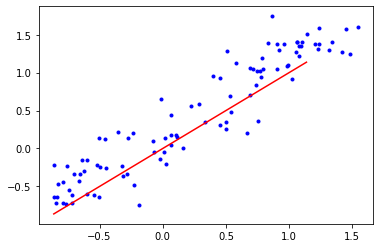

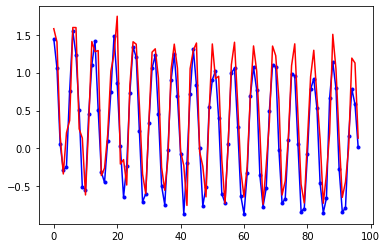

Final validation error is: %f 0.07089821994304657


In [43]:
"""
#print(history.history['accuracy'])
#print(history.history[])
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(acc)
plt.plot(val_acc)
plt.title('Accuracy')
plt.legend(['train_acc', 'test_acc'], loc = 'upper left')
plt.show()
"""


plt.plot(tsty, mlp_model.predict(tstx),'b.')
plt.plot(np.arange(min(tsty), max(tsty)+ 0.5), np.arange(min(tsty), max(tsty)+0.5), 'r')
plt.show()




plt.plot(range(tsty.shape[0]),tsty, 'b.-')
plt.plot(range(tsty.shape[0]),mlp_model.predict(tstx), 'r-')
plt.show()

print("Final validation error is: %f", float(history.history['mean_squared_error'][len(history.history['val_mean_squared_error'])-1]))
#print("Final validation error is: %f" float() history.history['val_mean_squared_error'][len(history.history['val_mean_squared_error'])-1].astype(np.float32))

## RNN (Many-to-Many)
---

In [44]:
#Many-to-Many
batch_size = 10
sequence_length = 4
data_dim = 3

## input dimension 과 Sequence length
---
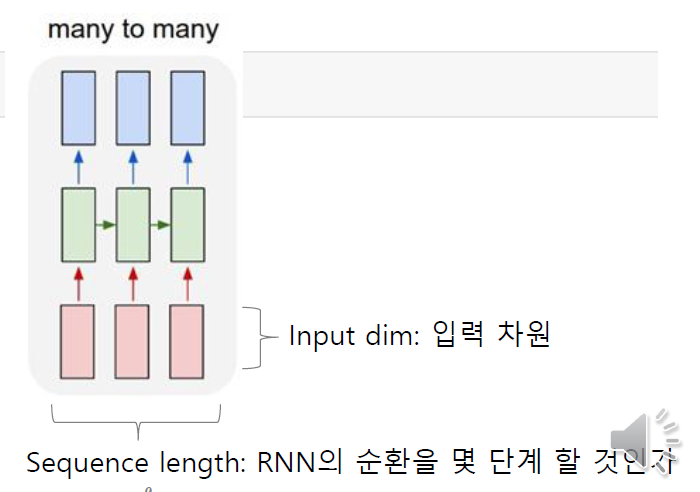

In [45]:
datax = data_matrix_np[0:data_matrix_np.shape[0]-1,0:3]
datay = data_matrix_np[0:data_matrix_np.shape[0]-1:,3]
print(datax.shape)
print(datay.shape)

(396, 3)
(396,)


In [46]:
datax = np.reshape(datax,(-1,sequence_length, data_dim))
datay = np.reshape(datay, (-1, sequence_length, 1))
print(datax.shape)
print(datay.shape)

(99, 4, 3)
(99, 4, 1)


In [47]:
trnx = datax[0:70, :]
trny = datay[0:70]
tstx = datax[70:datax.shape[0],:]
tsty = datax[70:datax.shape[0]]
print(trnx.shape)
print(tstx.shape)
print(trny.shape)
print(tsty.shape)

(70, 4, 3)
(29, 4, 3)
(70, 4, 1)
(29, 4, 3)


In [48]:
# 입력 텐서
input_shape = (datax[0].shape)
input_tensor = layers.Input(input_shape)
print(input_shape)

(4, 3)


In [49]:
rnn_layer = layers.LSTM(10,return_sequences=True)(input_tensor)
output_tensor = layers.TimeDistributed(layers.Dense(1,activation='linear'))(rnn_layer)

In [50]:
# model compile
model_mtom = models.Model(input_tensor, output_tensor)
model_mtom.compile(optimizer="Adam", loss='mean_squared_error',metrics=['mean_squared_error'])

In [51]:
model_mtom.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4, 3)]            0         
                                                                 
 lstm (LSTM)                 (None, 4, 10)             560       
                                                                 
 time_distributed (TimeDistr  (None, 4, 1)             11        
 ibuted)                                                         
                                                                 
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


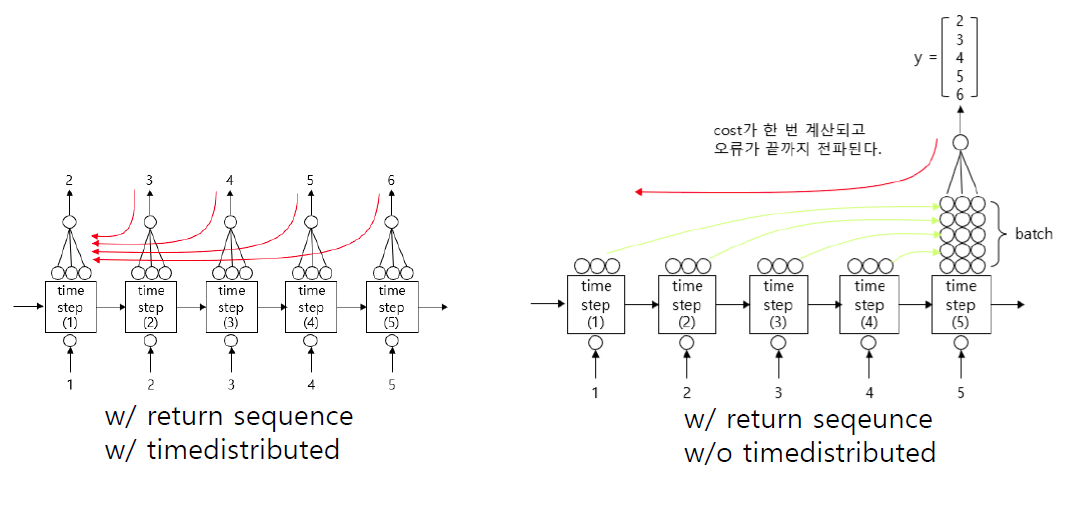

In [52]:
history = model_mtom.fit(trnx, trny, validation_data = [tstx, tsty], batch_size=10, epochs=300)

Epoch 1/300
7/7 [==============================] - 1s 57ms/step - loss: 3.0201 - mean_squared_error: 3.0201 - val_loss: 0.7627 - val_mean_squared_error: 0.7627
Epoch 2/300
7/7 [==============================] - 0s 4ms/step - loss: 2.8077 - mean_squared_error: 2.8077 - val_loss: 0.7258 - val_mean_squared_error: 0.7258
Epoch 3/300
7/7 [==============================] - 0s 5ms/step - loss: 2.6170 - mean_squared_error: 2.6170 - val_loss: 0.6927 - val_mean_squared_error: 0.6927
Epoch 4/300
7/7 [==============================] - 0s 6ms/step - loss: 2.4346 - mean_squared_error: 2.4346 - val_loss: 0.6632 - val_mean_squared_error: 0.6632
Epoch 5/300
7/7 [==============================] - 0s 6ms/step - loss: 2.2642 - mean_squared_error: 2.2642 - val_loss: 0.6370 - val_mean_squared_error: 0.6370
Epoch 6/300
7/7 [==============================] - 0s 5ms/step - loss: 2.1062 - mean_squared_error: 2.1062 - val_loss: 0.6136 - val_mean_squared_error: 0.6136
Epoch 7/300
7/7 [============================

7/7 [==============================] - 0s 5ms/step - loss: 0.3812 - mean_squared_error: 0.3812 - val_loss: 0.6938 - val_mean_squared_error: 0.6938
Epoch 53/300
7/7 [==============================] - 0s 5ms/step - loss: 0.3646 - mean_squared_error: 0.3646 - val_loss: 0.7045 - val_mean_squared_error: 0.7045
Epoch 54/300
7/7 [==============================] - 0s 5ms/step - loss: 0.3486 - mean_squared_error: 0.3486 - val_loss: 0.7121 - val_mean_squared_error: 0.7121
Epoch 55/300
7/7 [==============================] - 0s 5ms/step - loss: 0.3343 - mean_squared_error: 0.3343 - val_loss: 0.7223 - val_mean_squared_error: 0.7223
Epoch 56/300
7/7 [==============================] - 0s 5ms/step - loss: 0.3190 - mean_squared_error: 0.3190 - val_loss: 0.7331 - val_mean_squared_error: 0.7331
Epoch 57/300
7/7 [==============================] - 0s 5ms/step - loss: 0.3057 - mean_squared_error: 0.3057 - val_loss: 0.7434 - val_mean_squared_error: 0.7434
Epoch 58/300
7/7 [==============================] - 0

7/7 [==============================] - 0s 5ms/step - loss: 0.1130 - mean_squared_error: 0.1130 - val_loss: 0.9153 - val_mean_squared_error: 0.9153
Epoch 104/300
7/7 [==============================] - 0s 5ms/step - loss: 0.1119 - mean_squared_error: 0.1119 - val_loss: 0.9204 - val_mean_squared_error: 0.9204
Epoch 105/300
7/7 [==============================] - 0s 5ms/step - loss: 0.1111 - mean_squared_error: 0.1111 - val_loss: 0.9233 - val_mean_squared_error: 0.9233
Epoch 106/300
7/7 [==============================] - 0s 5ms/step - loss: 0.1091 - mean_squared_error: 0.1091 - val_loss: 0.9281 - val_mean_squared_error: 0.9281
Epoch 107/300
7/7 [==============================] - 0s 5ms/step - loss: 0.1079 - mean_squared_error: 0.1079 - val_loss: 0.9316 - val_mean_squared_error: 0.9316
Epoch 108/300
7/7 [==============================] - 0s 5ms/step - loss: 0.1066 - mean_squared_error: 0.1066 - val_loss: 0.9359 - val_mean_squared_error: 0.9359
Epoch 109/300
7/7 [=============================

Epoch 154/300
7/7 [==============================] - 0s 5ms/step - loss: 0.0734 - mean_squared_error: 0.0734 - val_loss: 1.0808 - val_mean_squared_error: 1.0808
Epoch 155/300
7/7 [==============================] - 0s 5ms/step - loss: 0.0731 - mean_squared_error: 0.0731 - val_loss: 1.0825 - val_mean_squared_error: 1.0825
Epoch 156/300
7/7 [==============================] - 0s 4ms/step - loss: 0.0725 - mean_squared_error: 0.0725 - val_loss: 1.0840 - val_mean_squared_error: 1.0840
Epoch 157/300
7/7 [==============================] - 0s 5ms/step - loss: 0.0721 - mean_squared_error: 0.0721 - val_loss: 1.0869 - val_mean_squared_error: 1.0869
Epoch 158/300
7/7 [==============================] - 0s 5ms/step - loss: 0.0718 - mean_squared_error: 0.0718 - val_loss: 1.0876 - val_mean_squared_error: 1.0876
Epoch 159/300
7/7 [==============================] - 0s 5ms/step - loss: 0.0713 - mean_squared_error: 0.0713 - val_loss: 1.0914 - val_mean_squared_error: 1.0914
Epoch 160/300
7/7 [===============

Epoch 205/300
7/7 [==============================] - 0s 6ms/step - loss: 0.0588 - mean_squared_error: 0.0588 - val_loss: 1.1491 - val_mean_squared_error: 1.1491
Epoch 206/300
7/7 [==============================] - 0s 5ms/step - loss: 0.0588 - mean_squared_error: 0.0588 - val_loss: 1.1509 - val_mean_squared_error: 1.1509
Epoch 207/300
7/7 [==============================] - 0s 5ms/step - loss: 0.0585 - mean_squared_error: 0.0585 - val_loss: 1.1527 - val_mean_squared_error: 1.1527
Epoch 208/300
7/7 [==============================] - 0s 5ms/step - loss: 0.0583 - mean_squared_error: 0.0583 - val_loss: 1.1526 - val_mean_squared_error: 1.1526
Epoch 209/300
7/7 [==============================] - 0s 5ms/step - loss: 0.0585 - mean_squared_error: 0.0585 - val_loss: 1.1523 - val_mean_squared_error: 1.1523
Epoch 210/300
7/7 [==============================] - 0s 5ms/step - loss: 0.0579 - mean_squared_error: 0.0579 - val_loss: 1.1587 - val_mean_squared_error: 1.1587
Epoch 211/300
7/7 [===============

Epoch 256/300
7/7 [==============================] - 0s 6ms/step - loss: 0.0516 - mean_squared_error: 0.0516 - val_loss: 1.1790 - val_mean_squared_error: 1.1790
Epoch 257/300
7/7 [==============================] - 0s 6ms/step - loss: 0.0515 - mean_squared_error: 0.0515 - val_loss: 1.1819 - val_mean_squared_error: 1.1819
Epoch 258/300
7/7 [==============================] - 0s 6ms/step - loss: 0.0514 - mean_squared_error: 0.0514 - val_loss: 1.1824 - val_mean_squared_error: 1.1824
Epoch 259/300
7/7 [==============================] - 0s 6ms/step - loss: 0.0513 - mean_squared_error: 0.0513 - val_loss: 1.1811 - val_mean_squared_error: 1.1811
Epoch 260/300
7/7 [==============================] - 0s 6ms/step - loss: 0.0513 - mean_squared_error: 0.0513 - val_loss: 1.1805 - val_mean_squared_error: 1.1805
Epoch 261/300
7/7 [==============================] - 0s 6ms/step - loss: 0.0511 - mean_squared_error: 0.0511 - val_loss: 1.1825 - val_mean_squared_error: 1.1825
Epoch 262/300
7/7 [===============

In [53]:
"""
tmp = np.reshape(tsty, (-1,3))
plt.plot(tmp, np.reshape(model_mtom.predict(tstx), (-1,1)),'b.')
plt.plot(np.arange(min(tmp), max(tmp)+ 0.5), np.arange(min(tmp), max(tmp)+0.5), 'r')
plt.show()

plt.plot(range(tmp.shape[0]),tmp, 'b.-')
plt.plot(range(tmp.shape[0]),np.reshape(model_mtom.predict(tstx), (-1,1)), 'r-')
plt.show()

print("Final validation error is: %f", float(history.history['val_mean_squared_error'][len(history.history['val_mean_squared_error'])-1]))
"""

'\ntmp = np.reshape(tsty, (-1,3))\nplt.plot(tmp, np.reshape(model_mtom.predict(tstx), (-1,1)),\'b.\')\nplt.plot(np.arange(min(tmp), max(tmp)+ 0.5), np.arange(min(tmp), max(tmp)+0.5), \'r\')\nplt.show()\n\nplt.plot(range(tmp.shape[0]),tmp, \'b.-\')\nplt.plot(range(tmp.shape[0]),np.reshape(model_mtom.predict(tstx), (-1,1)), \'r-\')\nplt.show()\n\nprint("Final validation error is: %f", float(history.history[\'val_mean_squared_error\'][len(history.history[\'val_mean_squared_error\'])-1]))\n'

## Many-to-One
---

In [54]:
data_time.shape

(400,)

In [55]:
data_matrix = []
seq_len = 4
for i in range(0, len(data_time)-data_dim*seq_len):
    tmp_data = data_time[i:i+data_dim*seq_len+1]
    data_matrix.append(tmp_data)

data_matrix_np = np.array(data_matrix)
print(data_matrix_np.shape)
print(data_matrix_np)


(388, 13)
[[ 2.04387281  2.79549309  2.63687323 ...  1.58411568  0.94279655
   1.32074688]
 [ 2.79549309  2.63687323  2.2095365  ...  0.94279655  1.32074688
   2.55035961]
 [ 2.63687323  2.2095365   1.2721992  ...  1.32074688  2.55035961
   3.04147893]
 ...
 [ 0.92146152  0.52870332 -0.46007738 ... -0.7864364   0.16112249
   0.78588027]
 [ 0.52870332 -0.46007738 -0.84612145 ...  0.16112249  0.78588027
   0.58244701]
 [-0.46007738 -0.84612145 -0.65468044 ...  0.78588027  0.58244701
   0.01894878]]


In [56]:
datax = data_matrix_np[0:data_matrix_np.shape[0]-1,0:12]
datay = data_matrix_np[0:data_matrix_np.shape[0]-1:, 12]
print(datax.shape)
print(datay.shape)


(387, 12)
(387,)


In [57]:
datax = np.reshape(datax,(-1, seq_len,data_dim))
print(datax.shape)
print(datay.shape)

(387, 4, 3)
(387,)


In [58]:
trnx = datax[0:300, :]
trny = datay[0:300]
tstx = datax[300:datax.shape[0],:]
tsty = datay[300:datax.shape[0]]
print(trnx.shape)
print(tstx.shape)
print(trny.shape)
print(tsty.shape)

(300, 4, 3)
(87, 4, 3)
(300,)
(87,)


In [59]:
input_shape = (trnx[0].shape)
input_tensor = layers.Input(input_shape)

In [60]:
rnn_layer = layers.LSTM(10)(input_tensor)
output_tensor = layers.Dense(1, activation="linear")(rnn_layer)

In [61]:
model_mto = models.Model(input_tensor, output_tensor)
model_mto.compile(optimizer = 'Adam', loss='mean_squared_error', metrics=['mean_squared_error'])

In [62]:
model_mto.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4, 3)]            0         
                                                                 
 lstm_1 (LSTM)               (None, 10)                560       
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [63]:
history = model_mto.fit(trnx, trny, validation_data = [tstx, tsty], batch_size=10, epochs=300)

Epoch 1/300
30/30 [==============================] - 1s 12ms/step - loss: 1.5409 - mean_squared_error: 1.5409 - val_loss: 0.4919 - val_mean_squared_error: 0.4919
Epoch 2/300
30/30 [==============================] - 0s 2ms/step - loss: 0.8743 - mean_squared_error: 0.8743 - val_loss: 0.5263 - val_mean_squared_error: 0.5263
Epoch 3/300
30/30 [==============================] - 0s 2ms/step - loss: 0.5792 - mean_squared_error: 0.5792 - val_loss: 0.5703 - val_mean_squared_error: 0.5703
Epoch 4/300
30/30 [==============================] - 0s 2ms/step - loss: 0.4975 - mean_squared_error: 0.4975 - val_loss: 0.5684 - val_mean_squared_error: 0.5684
Epoch 5/300
30/30 [==============================] - 0s 2ms/step - loss: 0.4620 - mean_squared_error: 0.4620 - val_loss: 0.5352 - val_mean_squared_error: 0.5352
Epoch 6/300
30/30 [==============================] - 0s 2ms/step - loss: 0.4214 - mean_squared_error: 0.4214 - val_loss: 0.4917 - val_mean_squared_error: 0.4917
Epoch 7/300
30/30 [==============

30/30 [==============================] - 0s 3ms/step - loss: 0.0172 - mean_squared_error: 0.0172 - val_loss: 0.0900 - val_mean_squared_error: 0.0900
Epoch 52/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0171 - mean_squared_error: 0.0171 - val_loss: 0.0871 - val_mean_squared_error: 0.0871
Epoch 53/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0879 - val_mean_squared_error: 0.0879
Epoch 54/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0852 - val_mean_squared_error: 0.0852
Epoch 55/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0171 - mean_squared_error: 0.0171 - val_loss: 0.0854 - val_mean_squared_error: 0.0854
Epoch 56/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.0840 - val_mean_squared_error: 0.0840
Epoch 57/300
30/30 [=====================

30/30 [==============================] - 0s 2ms/step - loss: 0.0149 - mean_squared_error: 0.0149 - val_loss: 0.0516 - val_mean_squared_error: 0.0516
Epoch 102/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.0500 - val_mean_squared_error: 0.0500
Epoch 103/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0144 - mean_squared_error: 0.0144 - val_loss: 0.0502 - val_mean_squared_error: 0.0502
Epoch 104/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.0509 - val_mean_squared_error: 0.0509
Epoch 105/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.0503 - val_mean_squared_error: 0.0503
Epoch 106/300
30/30 [==============================] - 0s 3ms/step - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0490 - val_mean_squared_error: 0.0490
Epoch 107/300
30/30 [===============

30/30 [==============================] - 0s 2ms/step - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0348 - val_mean_squared_error: 0.0348
Epoch 152/300
30/30 [==============================] - 0s 3ms/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0343 - val_mean_squared_error: 0.0343
Epoch 153/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0339 - val_mean_squared_error: 0.0339
Epoch 154/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0341 - val_mean_squared_error: 0.0341
Epoch 155/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0345 - val_mean_squared_error: 0.0345
Epoch 156/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0341 - val_mean_squared_error: 0.0341
Epoch 157/300
30/30 [===============

30/30 [==============================] - 0s 3ms/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0270 - val_mean_squared_error: 0.0270
Epoch 202/300
30/30 [==============================] - 0s 3ms/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 203/300
30/30 [==============================] - 0s 3ms/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 204/300
30/30 [==============================] - 0s 3ms/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 205/300
30/30 [==============================] - 0s 3ms/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 206/300
30/30 [==============================] - 0s 3ms/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0273 - val_mean_squared_error: 0.0273
Epoch 207/300
30/30 [===============

30/30 [==============================] - 0s 3ms/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 252/300
30/30 [==============================] - 0s 3ms/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 253/300
30/30 [==============================] - 0s 3ms/step - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 254/300
30/30 [==============================] - 0s 3ms/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 255/300
30/30 [==============================] - 0s 3ms/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 256/300
30/30 [==============================] - 0s 3ms/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 257/300
30/30 [===============

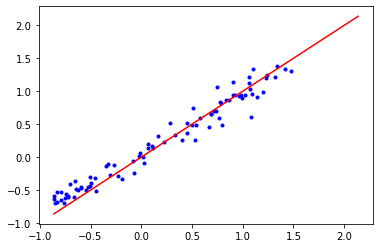

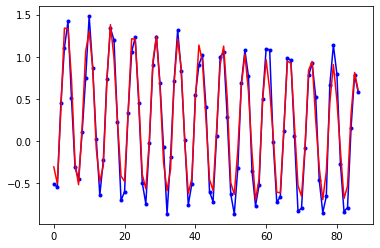

Final validation error is: %f 0.023918746039271355


In [64]:
plt.plot(tsty, model_mto.predict(tstx),'b.')
plt.plot(np.arange(min(tsty), max(tsty)+ 1), np.arange(min(tsty), max(tsty)+1), 'r')
plt.show()

plt.plot(range(tsty.shape[0]),tsty, 'b.-')
plt.plot(range(tsty.shape[0]),model_mto.predict(tstx), 'r-')
plt.show()

print("Final validation error is: %f", float(history.history['val_mean_squared_error'][len(history.history['val_mean_squared_error'])-1]))


# Bidirectional

In [68]:
input_shape=(trnx[0].shape)
input_tensor=layers.Input(input_shape)

rnn_layer = layers.Bidirectional(layers.LSTM(10), merge_mode = 'concat')(input_tensor)
output_tensor = layers.Dense(1, activation="linear")(rnn_layer)

model_bidirectional = models.Model(input_tensor, output_tensor)
model_bidirectional.compile(optimizer = "Adam", loss = 'mean_squared_error',metrics = ['mean_squared_error'])
model_bidirectional.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 4, 3)]            0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 20)               1120      
 nal)                                                            
                                                                 
 dense_15 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,141
Trainable params: 1,141
Non-trainable params: 0
_________________________________________________________________


In [69]:
history = model_bidirectional.fit(trnx, trny, validation_data = [tstx, tsty], batch_size=10, epochs=300)

Epoch 1/300
30/30 [==============================] - 2s 19ms/step - loss: 0.8235 - mean_squared_error: 0.8235 - val_loss: 0.4723 - val_mean_squared_error: 0.4723
Epoch 2/300
30/30 [==============================] - 0s 2ms/step - loss: 0.4716 - mean_squared_error: 0.4716 - val_loss: 0.5016 - val_mean_squared_error: 0.5016
Epoch 3/300
30/30 [==============================] - 0s 2ms/step - loss: 0.3968 - mean_squared_error: 0.3968 - val_loss: 0.4278 - val_mean_squared_error: 0.4278
Epoch 4/300
30/30 [==============================] - 0s 2ms/step - loss: 0.3214 - mean_squared_error: 0.3214 - val_loss: 0.3823 - val_mean_squared_error: 0.3823
Epoch 5/300
30/30 [==============================] - 0s 2ms/step - loss: 0.2418 - mean_squared_error: 0.2418 - val_loss: 0.3245 - val_mean_squared_error: 0.3245
Epoch 6/300
30/30 [==============================] - 0s 2ms/step - loss: 0.1593 - mean_squared_error: 0.1593 - val_loss: 0.2594 - val_mean_squared_error: 0.2594
Epoch 7/300
30/30 [==============

30/30 [==============================] - 0s 7ms/step - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.0547 - val_mean_squared_error: 0.0547
Epoch 52/300
30/30 [==============================] - 0s 6ms/step - loss: 0.0157 - mean_squared_error: 0.0157 - val_loss: 0.0533 - val_mean_squared_error: 0.0533
Epoch 53/300
30/30 [==============================] - 0s 6ms/step - loss: 0.0151 - mean_squared_error: 0.0151 - val_loss: 0.0526 - val_mean_squared_error: 0.0526
Epoch 54/300
30/30 [==============================] - 0s 5ms/step - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.0546 - val_mean_squared_error: 0.0546
Epoch 55/300
30/30 [==============================] - 0s 6ms/step - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.0537 - val_mean_squared_error: 0.0537
Epoch 56/300
30/30 [==============================] - 0s 6ms/step - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.0535 - val_mean_squared_error: 0.0535
Epoch 57/300
30/30 [=====================

30/30 [==============================] - 0s 9ms/step - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 102/300
30/30 [==============================] - 0s 9ms/step - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0430 - val_mean_squared_error: 0.0430
Epoch 103/300
30/30 [==============================] - 0s 7ms/step - loss: 0.0138 - mean_squared_error: 0.0138 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Epoch 104/300
30/30 [==============================] - 0s 9ms/step - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 105/300
30/30 [==============================] - 0s 8ms/step - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0434 - val_mean_squared_error: 0.0434
Epoch 106/300
30/30 [==============================] - 0s 8ms/step - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0417 - val_mean_squared_error: 0.0417
Epoch 107/300
30/30 [===============

30/30 [==============================] - 0s 6ms/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0366 - val_mean_squared_error: 0.0366
Epoch 152/300
30/30 [==============================] - 0s 6ms/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0345 - val_mean_squared_error: 0.0345
Epoch 153/300
30/30 [==============================] - 0s 6ms/step - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.0373 - val_mean_squared_error: 0.0373
Epoch 154/300
30/30 [==============================] - 0s 7ms/step - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0383 - val_mean_squared_error: 0.0383
Epoch 155/300
30/30 [==============================] - 0s 7ms/step - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0335 - val_mean_squared_error: 0.0335
Epoch 156/300
30/30 [==============================] - 0s 6ms/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0369 - val_mean_squared_error: 0.0369
Epoch 157/300
30/30 [===============

30/30 [==============================] - 0s 6ms/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0332 - val_mean_squared_error: 0.0332
Epoch 202/300
30/30 [==============================] - 0s 6ms/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0333 - val_mean_squared_error: 0.0333
Epoch 203/300
30/30 [==============================] - 0s 6ms/step - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0324 - val_mean_squared_error: 0.0324
Epoch 204/300
30/30 [==============================] - 0s 6ms/step - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.0353 - val_mean_squared_error: 0.0353
Epoch 205/300
30/30 [==============================] - 0s 5ms/step - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0321 - val_mean_squared_error: 0.0321
Epoch 206/300
30/30 [==============================] - 0s 5ms/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0333 - val_mean_squared_error: 0.0333
Epoch 207/300
30/30 [===============

30/30 [==============================] - 0s 5ms/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0339 - val_mean_squared_error: 0.0339
Epoch 252/300
30/30 [==============================] - 0s 5ms/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0348 - val_mean_squared_error: 0.0348
Epoch 253/300
30/30 [==============================] - 0s 5ms/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0318 - val_mean_squared_error: 0.0318
Epoch 254/300
30/30 [==============================] - 0s 6ms/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0336 - val_mean_squared_error: 0.0336
Epoch 255/300
30/30 [==============================] - 0s 6ms/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0340 - val_mean_squared_error: 0.0340
Epoch 256/300
30/30 [==============================] - 0s 5ms/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0350 - val_mean_squared_error: 0.0350
Epoch 257/300
30/30 [===============

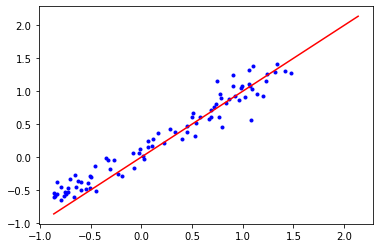

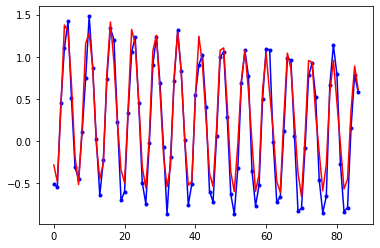

Final validation error is: %f 0.03720017522573471


In [70]:
plt.plot(tsty, model_bidirectional.predict(tstx),'b.')
plt.plot(np.arange(min(tsty), max(tsty)+ 1), np.arange(min(tsty), max(tsty)+1), 'r')
plt.show()

plt.plot(range(tsty.shape[0]),tsty, 'b.-')
plt.plot(range(tsty.shape[0]),model_bidirectional.predict(tstx), 'r-')
plt.show()

print("Final validation error is: %f", float(history.history['val_mean_squared_error'][len(history.history['val_mean_squared_error'])-1]))
